Epoch 0: W = 0.29999998211860657, Loss = 30.0
Epoch 10: W = 1.6653136014938354, Loss = 1.1627856492996216
Epoch 20: W = 1.934108853340149, Loss = 0.0450688973069191
Epoch 30: W = 1.987027645111084, Loss = 0.0017468547448515892
Epoch 40: W = 1.9974461793899536, Loss = 6.770494655938819e-05
Epoch 50: W = 1.9994971752166748, Loss = 2.6243997126584873e-06
Epoch 60: W = 1.9999010562896729, Loss = 1.0175587306093803e-07
Epoch 70: W = 1.9999804496765137, Loss = 3.9741685498029256e-09
Epoch 80: W = 1.999996304512024, Loss = 1.4670220593870908e-10
Epoch 90: W = 1.9999992847442627, Loss = 5.076827847005916e-12
최종 가중치: W = 1.9999996423721313


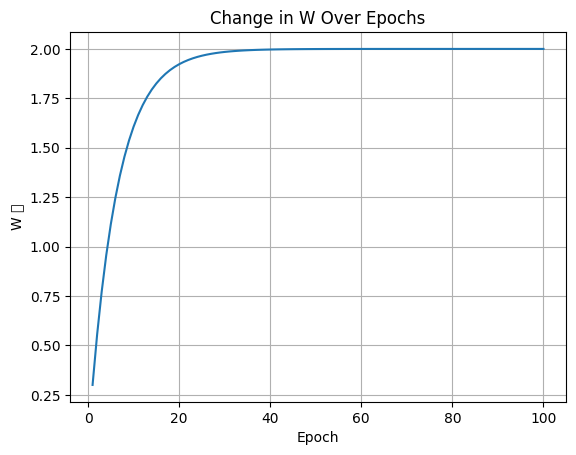

In [12]:
import torch

# 임의의 입력 데이터 (features)와 타겟 (labels)
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]], requires_grad=False)
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], requires_grad=False)

# 가중치 (weight) 초기화
W = torch.tensor([[0.0]], requires_grad=True)

# 학습률 (learning rate)
learning_rate = 0.01

# 손실 함수: Mean Squared Error (MSE)
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

W_list = []

# 학습 과정 (100번 반복)
for epoch in range(100):
    # 1. 예측 값 계산 (선형 모델 y_pred = W * x)
    y_pred = x.mm(W)

    # 2. 손실 함수 계산
    loss = loss_fn(y_pred, y)

    # 3. 역전파를 통해 기울기 계산
    loss.backward()

    # 4. 가중치 업데이트: W_new = W_old - learning_rate * gradient
    with torch.no_grad():  # 가중치 업데이트 시 자동 기울기 추적 방지
        W -= learning_rate * W.grad

    # 5. 기울기 초기화 (다음 epoch을 위해)
    W.grad.zero_()

    W_list.append(W.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: W = {W.item()}, Loss = {loss.item()}')

# 최종 가중치 확인
print(f'최종 가중치: W = {W.item()}')

import matplotlib.pyplot as plt  # matplotlib 임포트

# W 값 그래프 그리기
plt.plot(range(1, 101), W_list)
plt.xlabel('Epoch')
plt.ylabel('W 값')
plt.title('Change in W Over Epochs')
plt.grid(True)
plt.show()

Epoch 0: W = 0.29999998211860657, Loss = 30.0
Epoch 10: W = 1.6653136014938354, Loss = 1.1627856492996216
Epoch 20: W = 1.934108853340149, Loss = 0.0450688973069191
Epoch 30: W = 1.987027645111084, Loss = 0.0017468547448515892
Epoch 40: W = 1.9974461793899536, Loss = 6.770494655938819e-05
Epoch 50: W = 1.9994971752166748, Loss = 2.6243997126584873e-06
Epoch 60: W = 1.9999010562896729, Loss = 1.0175587306093803e-07
Epoch 70: W = 1.9999804496765137, Loss = 3.9741685498029256e-09
Epoch 80: W = 1.999996304512024, Loss = 1.4670220593870908e-10
Epoch 90: W = 1.9999992847442627, Loss = 5.076827847005916e-12
최종 가중치: W = 1.9999996423721313


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


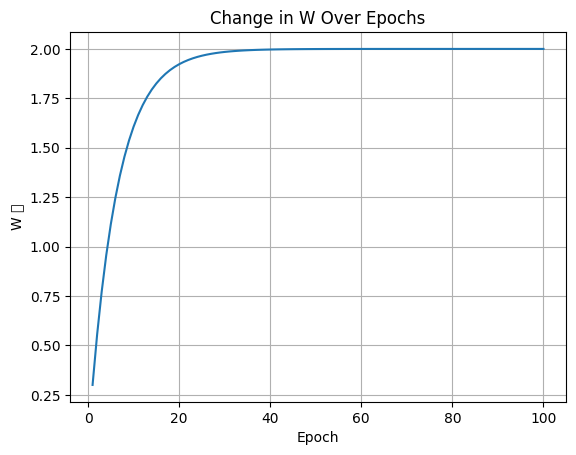

In [11]:
import torch

# 임의의 입력 데이터 (features)와 타겟 (labels)
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]], requires_grad=False)
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], requires_grad=False)

# 가중치 (weight) 초기화
W = torch.tensor([[0.0]], requires_grad=True)

# 학습률 (learning rate)
learning_rate = 0.01

# 손실 함수: Mean Squared Error (MSE)
def loss_fn(y_pred, y):
    return ((y_pred - y) ** 2).mean()

W_list = []

optimizer = torch.optim.SGD([W], lr=learning_rate)

# 학습 과정 (100번 반복)
for epoch in range(100):
    # 1. 예측 값 계산 (선형 모델 y_pred = W * x)
    y_pred = x.mm(W)

    # 2. 손실 함수 계산
    loss = loss_fn(y_pred, y)

    # 3. 역전파를 통해 기울기 계산
    loss.backward()

    # 4. 가중치 업데이트: W_new = W_old - learning_rate * gradient
    # with torch.no_grad():  # 가중치 업데이트 시 자동 기울기 추적 방지
    #     W -= learning_rate * W.grad
    optimizer.step()

    # 5. 기울기 초기화 (다음 epoch을 위해)
    W.grad.zero_()

    W_list.append(W.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: W = {W.item()}, Loss = {loss.item()}')

# 최종 가중치 확인
print(f'최종 가중치: W = {W.item()}')

import matplotlib.pyplot as plt  # matplotlib 임포트


# W 값 그래프 그리기
plt.plot(range(1, 101), W_list)
plt.xlabel('Epoch')
plt.ylabel('W 값')
plt.title('Change in W Over Epochs')
plt.grid(True)
plt.show()